In [229]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, rc={'text.usetex' : True})
sns.set_style(style='white')

In [230]:
latent_dim = 600
art = 0
arch = 'arch5' # defaul *
#n_days = 7
season = 'all*balkans2007-tmax*'#'allexec0--per_day*france2003*'#'all-per_day_for_mean_week-france2003*'#'all-try-keqiter-france2003*'
#season = "*-HWMId-per_day-spain1995-x1000-1995*epoch300-latent600-k20-arch4-VAE-analog-comparision-stats2023-5-26-16-55*"
#threshold = 'th0.1'
current= '*'#'2023-5-5-13-13'
k = 20
reduce_dim = 5000
path = './comparison-csv/'
#files_interest = glob.glob(path+f'{season}-{threshold}-france-epoch300-latent{latent_dim}-k3*')
#files_interest = glob.glob(path+f'{season}-latent{latent_dim}-k{k}*{arch}*{current}*')
files_interest = glob.glob(path+f'{season}-latent{latent_dim}-k{k}*{arch}*{current}*')
#files_interest = glob.glob(path+f'{season}*')
files_interest = sorted(files_interest)
#files_interest = files_interest[::2]
list_interest = [pd.read_csv(df) for df in files_interest]

In [231]:
#list_interest[0]

In [232]:
#files_interest

In [233]:
len(files_interest)

70

In [234]:
# import shutil
# for file_ in files_interest:
#    shutil.move(file_, f'./not-good/')

In [235]:
target = np.mean([elem.get('temp')[4::5] for elem in list_interest])
#print(target)

#analog_Pre = 20.934045410156273
analog_Pre = np.array([elem.get('temp')[0::5] for elem in list_interest]).flatten()
#print(analog_Pre)

#analog_Ind = list_interest[0].get('temp')[1]
analog_Ind = np.array([elem.get('temp')[1::5] for elem in list_interest]).flatten()
analog_Ind_prsdiff = np.array([elem.get('prs-diff')[1::5] for elem in list_interest]).flatten()
#print(analog_Ind)


AE_Pre = np.array([elem.get('temp')[2::5] for elem in list_interest]).flatten()

AE_Ind = np.array([elem.get('temp')[3::5] for elem in list_interest]).flatten()
AE_Ind_prsdiff = np.array([elem.get('prs-diff')[3::5] for elem in list_interest]).flatten()

# AE_I_Pre = [list_interest[i].get('temp')[5] for i in range(len(list_interest))]

# AE_I_Ind = [list_interest[i].get('temp')[4] for i in range(len(list_interest))]

print('Pre: ',np.mean(analog_Pre))
print('Post: ',np.mean(analog_Ind))
print(len(AE_Pre))
print(np.shape(AE_Pre))

Pre:  23.851488057599774
Post:  25.070802043805827
70000
(70000,)


In [236]:
#target = [elem.get('Unnamed: 0')[4::5] for elem in list_interest]

#analog_Pre = np.array([elem.get('Unnamed: 0')[0::5] for elem in list_interest]).flatten()

#analog_Ind = np.array([elem.get('Unnamed: 0')[1::5] for elem in list_interest]).flatten()

#AE_Pre = np.array([elem.get('Unnamed: 0')[2::5] for elem in list_interest]).flatten()

#AE_Ind = np.array([elem.get('Unnamed: 0')[3::5] for elem in list_interest]).flatten()

#print(np.unique(target, return_counts=True))
#print(np.unique(analog_Pre, return_counts=True))
#print(np.unique(analog_Ind, return_counts=True))
#print(np.unique(AE_Pre, return_counts=True))
#print(np.unique(AE_Ind, return_counts=True))

In [237]:
AE_Pre = np.reshape(AE_Pre, (int(len(AE_Pre)/reduce_dim), reduce_dim))
AE_Pre = np.mean(AE_Pre, axis=0)

AE_Ind = np.reshape(AE_Ind, (int(len(AE_Ind)/reduce_dim), reduce_dim))
AE_Ind = np.mean(AE_Ind, axis=0)

analog_Pre = np.reshape(analog_Pre, (int(len(analog_Pre)/reduce_dim), reduce_dim))
analog_Pre = np.mean(analog_Pre, axis=0)

analog_Ind = np.reshape(analog_Ind, (int(len(analog_Ind)/reduce_dim), reduce_dim))
analog_Ind = np.mean(analog_Ind, axis=0)

In [238]:
AE_Pre = np.array(AE_Pre)
# AE_Pre = np.concatenate((AE_Pre, AE_Pre+np.random.random(art)),axis=0)#+np.random.random(np.shape(AE_Pre))),axis=0)
# AE_I_Pre = np.array(AE_I_Pre)
# AE_I_Pre = np.concatenate((AE_I_Pre, AE_I_Pre+np.random.random(art)),axis=0)#+np.random.random(np.shape(AE_I_Pre))),axis=0)
print(np.shape(AE_Pre))
AE_Pre[::50]

(5000,)


array([25.60237601, 23.71744036, 24.25178135, 24.51726031, 25.07587149,
       25.41248038, 24.81428353, 23.04578334, 23.4462568 , 24.78969073,
       24.94819467, 24.05321437, 22.28062919, 24.28374416, 24.10723267,
       25.45961478, 24.00947614, 24.93875166, 23.70507202, 24.51272627,
       23.43130537, 23.81723502, 23.58178973, 24.37771432, 24.68576747,
       25.00616499, 23.17623291, 24.62972412, 23.93567156, 25.67655116,
       24.25799386, 26.49900208, 23.07043283, 25.15948094, 22.52676217,
       24.24385986, 23.81259853, 22.86227461, 24.60215367, 24.0117715 ,
       24.18630371, 24.27260524, 23.17961382, 23.96888777, 23.49859009,
       22.33750523, 24.04228472, 24.81073042, 23.73258362, 23.11494707,
       22.42564654, 23.50304129, 24.86853289, 24.22455967, 23.58096357,
       24.63038243, 25.4331386 , 23.66605312, 24.88852626, 23.34860273,
       24.79725255, 24.2791796 , 23.78777684, 25.87694484, 23.63956168,
       24.38843035, 22.98665554, 24.05875113, 24.29724165, 23.75

In [239]:
AE_Ind = np.array(AE_Ind)
# AE_Ind = np.concatenate((AE_Ind, AE_Ind+np.random.random(art)),axis=0)#+np.random.random(np.shape(AE_Ind))),axis=0)
# AE_I_Ind = np.array(AE_I_Ind)
# AE_I_Ind = np.concatenate((AE_I_Ind, AE_I_Ind+np.random.random(art)),axis=0)#+np.random.random(np.shape(AE_I_Ind))),axis=0)
AE_Ind[::50]

array([25.94441485, 26.86750837, 25.62005877, 27.02054967, 26.19778268,
       27.13711591, 24.87377101, 26.52764718, 25.11877267, 25.93669172,
       25.13211103, 26.42967268, 25.97177168, 25.695544  , 26.6479344 ,
       25.76581508, 26.12007621, 25.43945138, 27.37706037, 26.63106907,
       26.49029803, 25.6922154 , 25.74028713, 27.78497358, 26.16976754,
       26.66989397, 23.9019758 , 26.58932103, 26.5573604 , 24.97338257,
       26.68538382, 26.56262687, 27.27925371, 25.87589634, 26.03606131,
       26.8696664 , 26.61310076, 26.77241124, 26.848509  , 27.29250488,
       25.90662755, 27.37277265, 25.32305516, 26.15846078, 26.74610726,
       26.9785771 , 25.84330357, 25.52758833, 25.63347996, 24.9535178 ,
       25.73550459, 26.2783796 , 24.99997646, 25.25003313, 26.5914529 ,
       25.58537554, 24.6484423 , 26.57854396, 26.07291783, 24.49885821,
       25.55672607, 24.74302063, 24.32465951, 25.98734654, 25.82951617,
       24.74558411, 26.84613299, 26.4273686 , 24.93620562, 25.80

In [240]:
#print('AE Pre Pre: ',np.mean(AE_Pre))
#print('Diff with T:', target-np.mean(AE_Pre))
print('AE Ind Ind mean: ',np.mean(AE_Ind))
print('AE Ind Ind std: ',np.std(AE_Ind))
print('Diff with T:', target-np.mean(AE_Ind))
print('Diff with Prs', np.mean(AE_Ind_prsdiff))
#print('Analog Pre: ',np.mean(analog_Pre))
#print('Diff with T:', target-np.mean(analog_Pre))
print('Analog Ind mean: ',np.mean(analog_Ind))
print('Analog Ind std: ',np.std(analog_Ind))
print('Diff with T:', target-np.mean(analog_Ind))
print('Diff with Prs', np.mean(analog_Ind_prsdiff))
print('Target: ', target)
# print('AE Ind Pre: ',np.mean(AE_I_Pre))
# print('Diff with T:', target-np.mean(AE_I_Pre))
# print('AE Ind Ind: ',np.mean(AE_I_Ind))
# print('Diff with T:', target-np.mean(AE_I_Ind))

AE Ind Ind mean:  25.983748498971142
AE Ind Ind std:  0.8338989272282132
Diff with T: 3.2554617933000856
Diff with Prs 0.11246450142715085
Analog Ind mean:  25.070802043805823
Analog Ind std:  1.009035341525248
Diff with T: 4.168408248465404
Diff with Prs 0.020996315345491633
Target:  29.239210292271228


In [241]:
#np.mean(list_interest,axis=1)
# l_stat = [elem.drop(columns='Unnamed: 0') for elem in list_interest]
# mean_stat = np.mean(l_stat,axis=0)
# np.concatenate((mean_stat[2:4,0], [mean_stat[5,0], mean_stat[4,0]]),axis=0)
#np.append(mean_stat[2:4,0])

In [242]:
# analog_Pre = np.zeros(np.shape(AE_Pre)) + analog_Pre
# analog_Ind = np.zeros(np.shape(AE_Pre)) + analog_Ind
# target = np.zeros(np.shape(AE_Pre)) + target
target = np.zeros(np.shape(analog_Ind)) + target

In [243]:
#matrix_comp = np.array([analog_Pre, analog_Ind, AE_Pre, AE_Ind])
matrix_comp = np.array([analog_Ind, AE_Ind])
#df_comp = pd.DataFrame(matrix_comp.T, columns=['Analog in Pre', 'Analog in Post', 'AE in Pre', 'AE in Post'])
df_comp = pd.DataFrame(matrix_comp.T, columns=['Analog in Post', 'AE in Post'])

In [244]:
df_comp_melted = df_comp.melt()

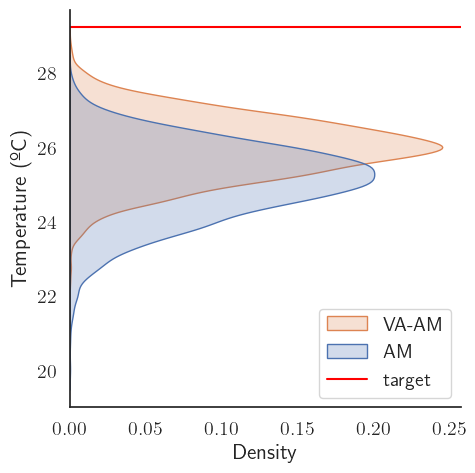

In [248]:
a = sns.displot(df_comp_melted, y = 'value', hue = 'variable', kind='kde', fill=True, legend=False)
children = plt.gca().get_children()
l = plt.axhline(target[0], color='red')
#plt.legend(children[:4] + [l], ['AE Post', 'AE Pre', 'Analog Post', 'Analog Pre', 'target'])
plt.legend(children[:2] + [l], ['VA-AM', 'AM', 'target'], loc='upper right', bbox_to_anchor=(1,0.9))
plt.ylabel('Temperature (ºC)')
plt.savefig((f'./figures/distribution-{season}-automated-functions-LatentSpace{latent_dim}-{k}.png').replace('*',''))
plt.savefig((f'./figures/distribution-{season}-automated-functions-LatentSpace{latent_dim}-{k}.pdf').replace('*',''))

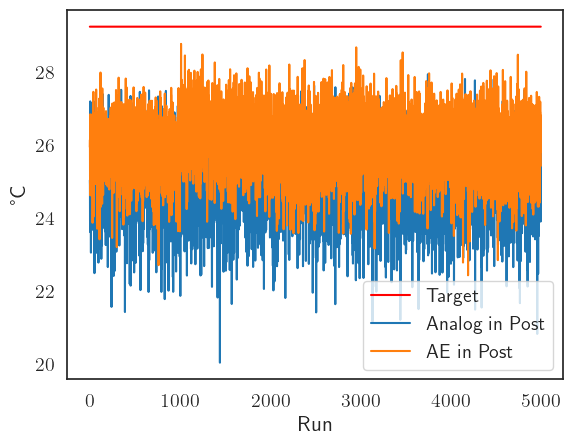

In [246]:
fig = plt.figure()
plt.plot(target, color='red', label='Target')
#plt.plot(analog_Pre, color='tan', label='Analog in Pre')
#plt.plot(analog_Pre, color='blue', label='Analog in Pre')
#plt.plot(AE_Pre, color='blue', label='AE in Pre')
#plt.plot(analog_Ind, color='darkorange', label='Analog in Post')
#plt.plot(AE_Ind, color='green', label='AE in Post')
plt.plot(analog_Ind, color='tab:blue', label='Analog in Post')
plt.plot(AE_Ind, color='tab:orange', label='AE in Post')
plt.legend(loc='lower right')
#plt.title(f'Comparison for threshold {threshold}')
plt.xlabel('Run')
plt.ylabel('°C')
plt.savefig(f'./figures/{season}-automated-functions-LatentSpace{latent_dim}-{k}.png')
plt.show()

In [247]:
list_interest

[               Unnamed: 0  prs-diff  temp-diff       temp
 0          WithoutAE-Pre0  0.027247   2.757653  25.828851
 1         WithoutAE-Post0  0.021159   3.437768  30.101221
 2         WithAE-Pre-Pre0  0.041507   3.781084  30.147638
 3       WithAE-Post-Post0  0.120201   4.496038  23.522272
 4               Original0  0.000000   0.000000  27.979486
 ...                   ...       ...        ...        ...
 4995     WithoutAE-Pre999  0.028335   6.772880  21.211816
 4996    WithoutAE-Post999  0.021385   3.007900  29.125269
 4997    WithAE-Pre-Pre999  0.048271   3.082819  25.945886
 4998  WithAE-Post-Post999  0.120792   2.656476  25.480341
 4999          Original999  0.000000   0.000000  27.979486
 
 [5000 rows x 4 columns],
                Unnamed: 0  prs-diff  temp-diff       temp
 0          WithoutAE-Pre0  0.029035   2.966985  28.157068
 1         WithoutAE-Post0  0.015117   2.629525  26.125848
 2         WithAE-Pre-Pre0  0.047369   6.739946  21.847375
 3       WithAE-Post-Post0  